In [225]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Text(0.5, 1.0, 'Imagem Original')

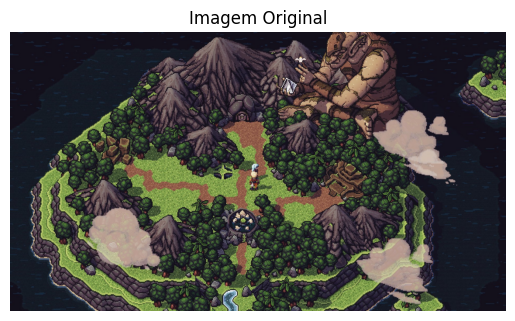

In [226]:
dicionario = {'Floresta': 'Mapas/Floresta.jpeg', 'Trilha':'Mapas/Trilha.jpeg'}
escolha = 'Floresta' 
original_image = Image.open(dicionario[escolha])
cv2_img = np.array(original_image)
plt.imshow(cv2_img)
plt.axis('off')
plt.title('Imagem Original')

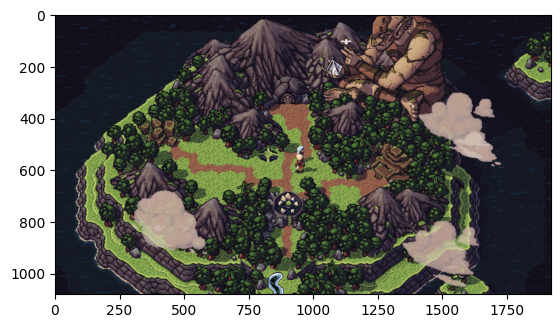

In [227]:
sem_azul_image = cv2_img.copy()
# Definir os limites para detecção da cor azul
limite_inferior = np.array([0, 50, 50])  # Azul escuro
limite_superior = np.array([60, 255, 255 ])  # Azul claro

# Criar uma máscara para pixels azuis
mascara_azul = cv2.inRange(cv2_img, limite_inferior, limite_superior)

# Substituir pixels azuis por preto na imagem originalm
sem_azul_image[mascara_azul != 0] = [0, 0, 0]
plt.imshow(sem_azul_image)

Text(0.5, 1.0, 'Imagem em Escala de Cinza')

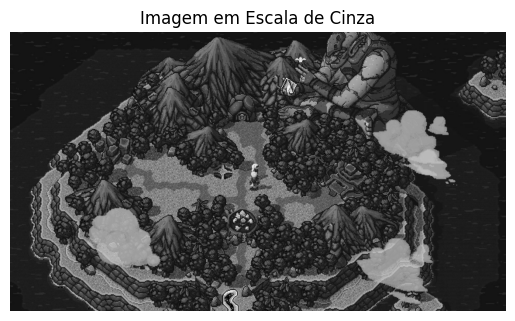

In [228]:
gray_image = cv2.cvtColor(sem_azul_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Imagem em Escala de Cinza')


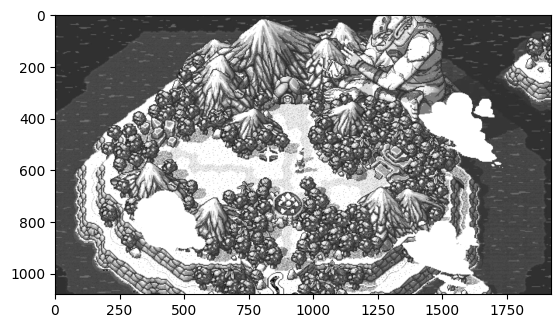

In [229]:
alpha = 1.5  # Fator de aumento de contraste
beta = 100  # Valor de compensação
contrast_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)
plt.imshow(contrast_image, cmap='gray')


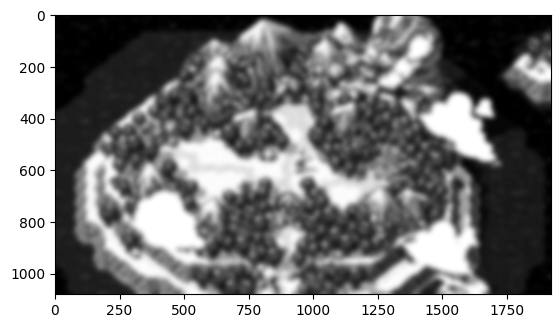

In [230]:
# Aplicar filtro de desfoque
kernel = (15,15)
desvio_padrao = 100
blurred_image = cv2.GaussianBlur(contrast_image, kernel, desvio_padrao)
blurred_image = cv2.GaussianBlur(blurred_image, kernel, desvio_padrao)
blurred_image = cv2.GaussianBlur(blurred_image, kernel, desvio_padrao)
blurred_image = cv2.GaussianBlur(blurred_image, kernel, desvio_padrao)
blurred_image = cv2.GaussianBlur(blurred_image, kernel, desvio_padrao)
plt.imshow(blurred_image, cmap='gray')
# Aplicar filtro de média
#averaged_image = cv2.blur(image, (kernel_width, kernel_height))

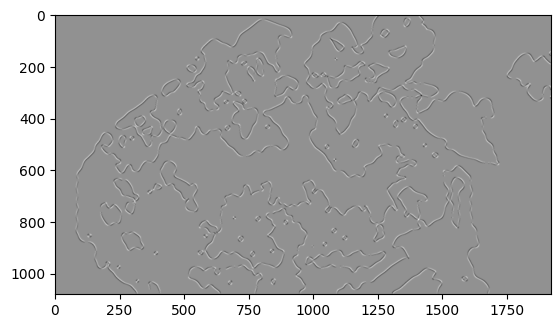

In [231]:
# Aplicar detecção de bordas usando o operador de Sobel
_, thresholded_image = cv2.threshold(blurred_image, 180, 200, cv2.THRESH_BINARY)
edges = cv2.Sobel(thresholded_image, cv2.CV_64F, 1, 1, ksize=15)
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(edges, cmap = 'gray')

True

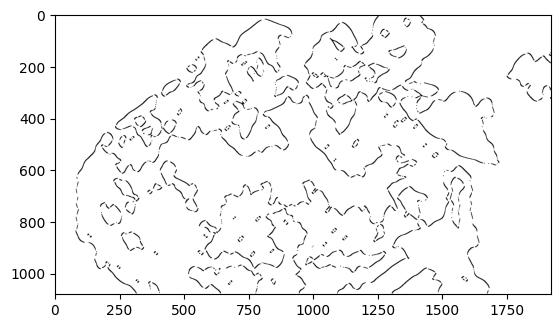

In [232]:
_, binary_image = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

# Exibir a imagem binarizada
plt.imshow(binary_image, cmap='gray')
cv2.imwrite(f'results/{escolha}.jpeg', binary_image)